In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVR
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
plt.style.use('fivethirtyeight')


In [118]:
#read in the data
data = pd.read_csv('ETH-USD.csv')
#set the date as the index
data = data.set_index(pd.DatetimeIndex(data['Date']))
#show the data
data

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2019-01-01,1/1/2019,133.418152,141.397507,132.650711,140.819412,140.819412,2258709868
2019-01-02,1/2/2019,141.519516,156.929138,140.650955,155.047684,155.047684,3328240369
2019-01-03,1/3/2019,155.196045,155.863052,147.198364,149.135010,149.135010,2676164880
2019-01-04,1/4/2019,148.912888,156.878983,147.907104,154.581940,154.581940,3126192535
2019-01-05,1/5/2019,154.337418,160.824890,154.337418,155.638596,155.638596,3338211928
...,...,...,...,...,...,...,...
2023-03-27,3/27/2023,1775.481323,1781.379272,1690.516602,1715.460815,1715.460815,8585750760
2023-03-28,3/28/2023,1715.327393,1791.110962,1702.564697,1772.785645,1772.785645,8346890042
2023-03-29,3/29/2023,1772.899902,1825.600952,1772.899902,1793.001831,1793.001831,9136176952


In [119]:
future_day= 30

In [120]:
#Create a new column
#data[str(future_day)+'_Day_Price_Forecast'] = data[["Close"]].shift(-future_day)
data[str(future_day)+'_Day_Price_Forecast'] = data[["Close"]].shift(-future_day)
#Show the data
data[['Close', str(future_day)+'_Day_Price_Forecast']]
#data



,Close,30_Day_Price_Forecast
Date,,
2019-01-01,140.819412,107.061012
2019-01-02,155.047684,107.609787
2019-01-03,149.135010,110.430260
2019-01-04,154.581940,107.492668
2019-01-05,155.638596,107.821602
...,...,...
2023-03-27,1715.460815,NaN
2023-03-28,1772.785645,NaN
2023-03-29,1793.001831,NaN


In [121]:
X = np.array(data[['Close']])
X = X[:data.shape[0] - future_day]
print(X)

[[ 140.819412]
 [ 155.047684]
 [ 149.13501 ]
 ...
 [1634.326416]
 [1605.895142]
 [1663.433716]]


In [122]:
Y = np.array(data[str(future_day)+'_Day_Price_Forecast'])
Y = Y[:- future_day]
print(Y)

[ 107.061012  107.609787  110.43026  ... 1793.001831 1792.737183
 1822.022095]


In [123]:
val = np.array(data[['Close']])
val = val[- future_day:]
val


array([[1647.319336],
       [1569.167603],
       [1566.92395 ],
       [1564.46875 ],
       [1567.398682],
       [1561.933105],
       [1534.088257],
       [1438.660767],
       [1429.158081],
       [1482.616699],
       [1590.292969],
       [1680.30896 ],
       [1703.50708 ],
       [1656.180542],
       [1677.215454],
       [1792.485107],
       [1761.659668],
       [1785.576538],
       [1735.321289],
       [1806.760742],
       [1737.717041],
       [1816.405151],
       [1752.0448  ],
       [1743.764771],
       [1775.676758],
       [1715.460815],
       [1772.785645],
       [1793.001831],
       [1792.737183],
       [1822.022095]])

In [124]:
#Split the data
#Chia tập dữ liệu thành tập train, test và predict theo tỷ lệ 7-1-2
X_train = X[:int(X.shape[0]*0.6)]
Y_train = Y[:int(Y.shape[0]*0.6)]

X_test = X[int(X.shape[0]*0.6):int(X.shape[0]*0.9)]
Y_test = Y[int(Y.shape[0]*0.6):int(Y.shape[0]*0.9)]

X_val = X[int(X.shape[0]*0.9):]
Y_val = Y[int(Y.shape[0]*0.9):]



In [125]:
len(X_test)

456

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

X_pred = scaler.transform(data[['Close']])

c:\APP\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from scipy.stats import uniform, randint
svr = SVR()
# Tạo dictionary chứa các giá trị hyperparameters để thử nghiệm
param_grid = {'C':[0.01, 0.1, 1, 10 ,100],
              'gamma': [0.01, 0.1, 1, 10 ,100],
              'kernel': ['linear', 'rbf','sigmoid']}

In [128]:
X_Grid = np.concatenate([X_train_scaled,X_val_scaled])
Y_Grid = np.concatenate([Y_train,Y_val])

In [129]:
X_Grid.shape

(1065, 1)

In [130]:
# Tạo một đối tượng GridSearchCV với model là SVR, dictionary chứa các hyperparameters, và 5 fold cross validation
grid_search = GridSearchCV(svr, param_grid, refit=True, cv=8, scoring='neg_mean_squared_error')

In [131]:
# Huấn luyện đối tượng GridSearchCV
grid_search.fit(X_train_scaled, Y_train)

GridSearchCV(cv=8, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [132]:
# In ra bộ hyperparameters tốt nhất
best_para=grid_search.best_params_
kernel_best=best_para['kernel']
C_best=best_para['C']
gamma_best=best_para['gamma']
print(best_para)

{'C': 10, 'gamma': 1, 'kernel': 'sigmoid'}


In [133]:
grid_search.best_score_


-97297.59359580145

In [134]:
from sklearn.svm import SVR
svr_linear = SVR(kernel=kernel_best, C= C_best, gamma= gamma_best)
svr_linear.fit(X_train_scaled, Y_train)

SVR(C=10, gamma=1, kernel='sigmoid')

In [135]:
svr_linear_confidence = svr_linear.score(X_train_scaled, Y_train)
print('svr_rbf accuracy: ', svr_linear_confidence)

svr_rbf accuracy:  0.9007372299126372


In [136]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
X_test_pred = svr_linear.predict(X_test_scaled)

val_mse = mean_squared_error(Y_test, X_test_pred)
val_rmse = np.sqrt(val_mse)

# Tính toán giá trị MAPE
mape = mean_absolute_percentage_error(Y_test, X_test_pred)

print("MAPE:", mape)
print("RMSE:", val_rmse)

MAPE: 0.3124439306498473
RMSE: 1051.378130757296


In [137]:
from sklearn.metrics import mean_squared_error
# Tính toán giá trị RMSE
X_val_pred = svr_linear.predict(X_val_scaled)
rmse = mean_squared_error(Y_val, X_val_pred, squared= False)
rmse
# Tính toán giá trị MAPE
mape = mean_absolute_percentage_error(Y_val, X_val_pred)
print("MAPE:", mape)
print("RMSE:", rmse)

MAPE: 0.22001827516229858
RMSE: 345.49793996522476


Dự đoán

In [138]:
# # 13. Dự báo 30 ngày tiếp theo
# # Khởi tạo danh sách đầu vào x_input từ tập dữ liệu test
# x_input = X_test[-future_day:].reshape(-1, 1)

# # Dự đoán giá cho 30 ngày tiếp theo
# lst_output = []
# for i in range(30):
#     # Dự đoán giá cho ngày tiếp theo
#     x_input = scaler.transform(x_input)
#     yhat = svr_linear.predict(x_input)
    
#     # Lưu giá dự đoán vào danh sách kết quả
#     lst_output.append(yhat[0])
    
    
#     # Cập nhật đầu vào x_input bằng cách đẩy dự đoán vào cuối và cắt bớt phần tử đầu tiên
#     # x_input = np.append(x_input[0][1:], yhat[0]).reshape(1, future_day)
#     # x_input =np.append(x_input[:,1:], yhat[0], axis=1)
#     x_input = np.append(x_input[:][1:], yhat[0]).reshape(-1, 1)

In [139]:
# Y_val_scaled = scaler.transform(Y_val)
# last_30_days = svr_linear.predict(Y_val_scaled)
# last_30_days= last_30_days.reshape(-1,1)
# # last_30_days = scaler.fit_transform(last_30_days)
# # last_30_days = svr_linear.predict(last_30_days)
# #test = last_30_days
# # last_30_days = last_30_days[-future_day:]
# print(last_30_days)
# last_30_days.shape

In [140]:
# 13. Dự báo 30 ngày tiếp theo
# Khởi tạo danh sách đầu vào x_input từ tập dữ liệu test
x_input = Y_val[-30:].reshape(-1, 1)
x_input = scaler.transform(x_input)
# Dự đoán giá cho 30 ngày tiếp theo
i=0
lst_output = []
for i in range(future_day):
    # Dự đoán giá cho ngày tiếp theO
    
    yhat = svr_linear.predict(x_input)
    print("{} day output {}".format(i,yhat[0]))
    print(x_input.shape)
    # Lưu giá dự đoán vào danh sách kết quả
    
    lst_output.append(yhat[0])
    
    # Cập nhật đầu vào x_input bằng cách đẩy dự đoán vào cuối và cắt bớt phần tử đầu tiên
    # x_input = np.append(x_input[0][1:], yhat[0]).reshape(1, future_day)
    # x_input =np.append(x_input[:,1:], yhat[0], axis=1)
    yhat = yhat.reshape(-1,1)
    yhat = scaler.transform(yhat)
    x_input = np.append(x_input[1:], yhat[0]).reshape(-1, 1)
    i=i+1

0 day output 1882.6178680100704
(30, 1)
1 day output 1847.2521610710164
(30, 1)
2 day output 1846.1989996529674
(30, 1)
3 day output 1845.0440170383292
(30, 1)
4 day output 1846.4220201794092
(30, 1)
5 day output 1843.8484144093047
(30, 1)
6 day output 1830.5301701615674
(30, 1)
7 day output 1782.0631128433515
(30, 1)
8 day output 1776.9773133935732
(30, 1)
9 day output 1804.9570031124063
(30, 1)
10 day output 1857.0618192504382
(30, 1)
11 day output 1896.8169837417267
(30, 1)
12 day output 1906.5572957821125
(30, 1)
13 day output 1886.47272791818
(30, 1)
14 day output 1895.5030349675217
(30, 1)
15 day output 1942.1485213959872
(30, 1)
16 day output 1930.1264173943403
(30, 1)
17 day output 1939.4817151854675
(30, 1)
18 day output 1919.5985393991089
(30, 1)
19 day output 1947.6094154489174
(30, 1)
20 day output 1920.5660961677352
(30, 1)
21 day output 1951.2611849460359
(30, 1)
22 day output 1926.3109057370057
(30, 1)
23 day output 1922.9996506418906
(30, 1)
24 day output 1935.632621385

In [141]:
Y_test_pred= Y_test.reshape(-1,1)
print(Y_test_pred.shape)
Y_test_pred

(456, 1)


array([[2536.209961],
       [2561.852051],
       [2610.15332 ],
       [2502.349609],
       [2724.619873],
       [2827.328857],
       [2890.94165 ],
       [3157.23877 ],
       [3013.732666],
       [3167.856201],
       [3141.691162],
       [3164.245117],
       [3043.414307],
       [3322.21167 ],
       [3265.443359],
       [3310.50415 ],
       [3156.509521],
       [3014.845947],
       [3020.089844],
       [3182.702148],
       [3286.935303],
       [3226.083984],
       [3242.115479],
       [3319.257324],
       [3172.456299],
       [3224.915283],
       [3100.325439],
       [3270.60083 ],
       [3244.40332 ],
       [3227.002686],
       [3224.374268],
       [3433.732666],
       [3834.828125],
       [3790.98999 ],
       [3940.614746],
       [3887.828369],
       [3952.133545],
       [3928.379395],
       [3426.394287],
       [3497.315186],
       [3427.340088],
       [3211.505859],
       [3270.278076],
       [3410.134521],
       [3285.511719],
       [34

In [142]:
print(X.shape)

(1521, 1)


In [143]:
X_train_pred = svr_linear.predict(X_train_scaled)

In [144]:
# Tạo biểu đồ
actual = np.arange(len(data['Close']))
Predict = np.arange(len(data['Close'])- 30, len(data['Close']))

#index X_train
index_X_train = np.arange(len(X_train_pred))
#index X_val
index_X_test = np.arange(len(X_train_pred), len(X_train_pred) + len(X_test_pred))

#index X_test
index_X_val = np.arange(len(X_train_pred) + len(X_test_pred),len(X_train_pred) + len(X_test_pred) + len(X_val_pred))

In [145]:
Predict

array([1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531,
       1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542,
       1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550])

In [146]:
X_train_pred= X_train_pred.reshape(-1,1)
print(index_X_train.shape)

(912,)


In [147]:
lst_output = np.array(lst_output)

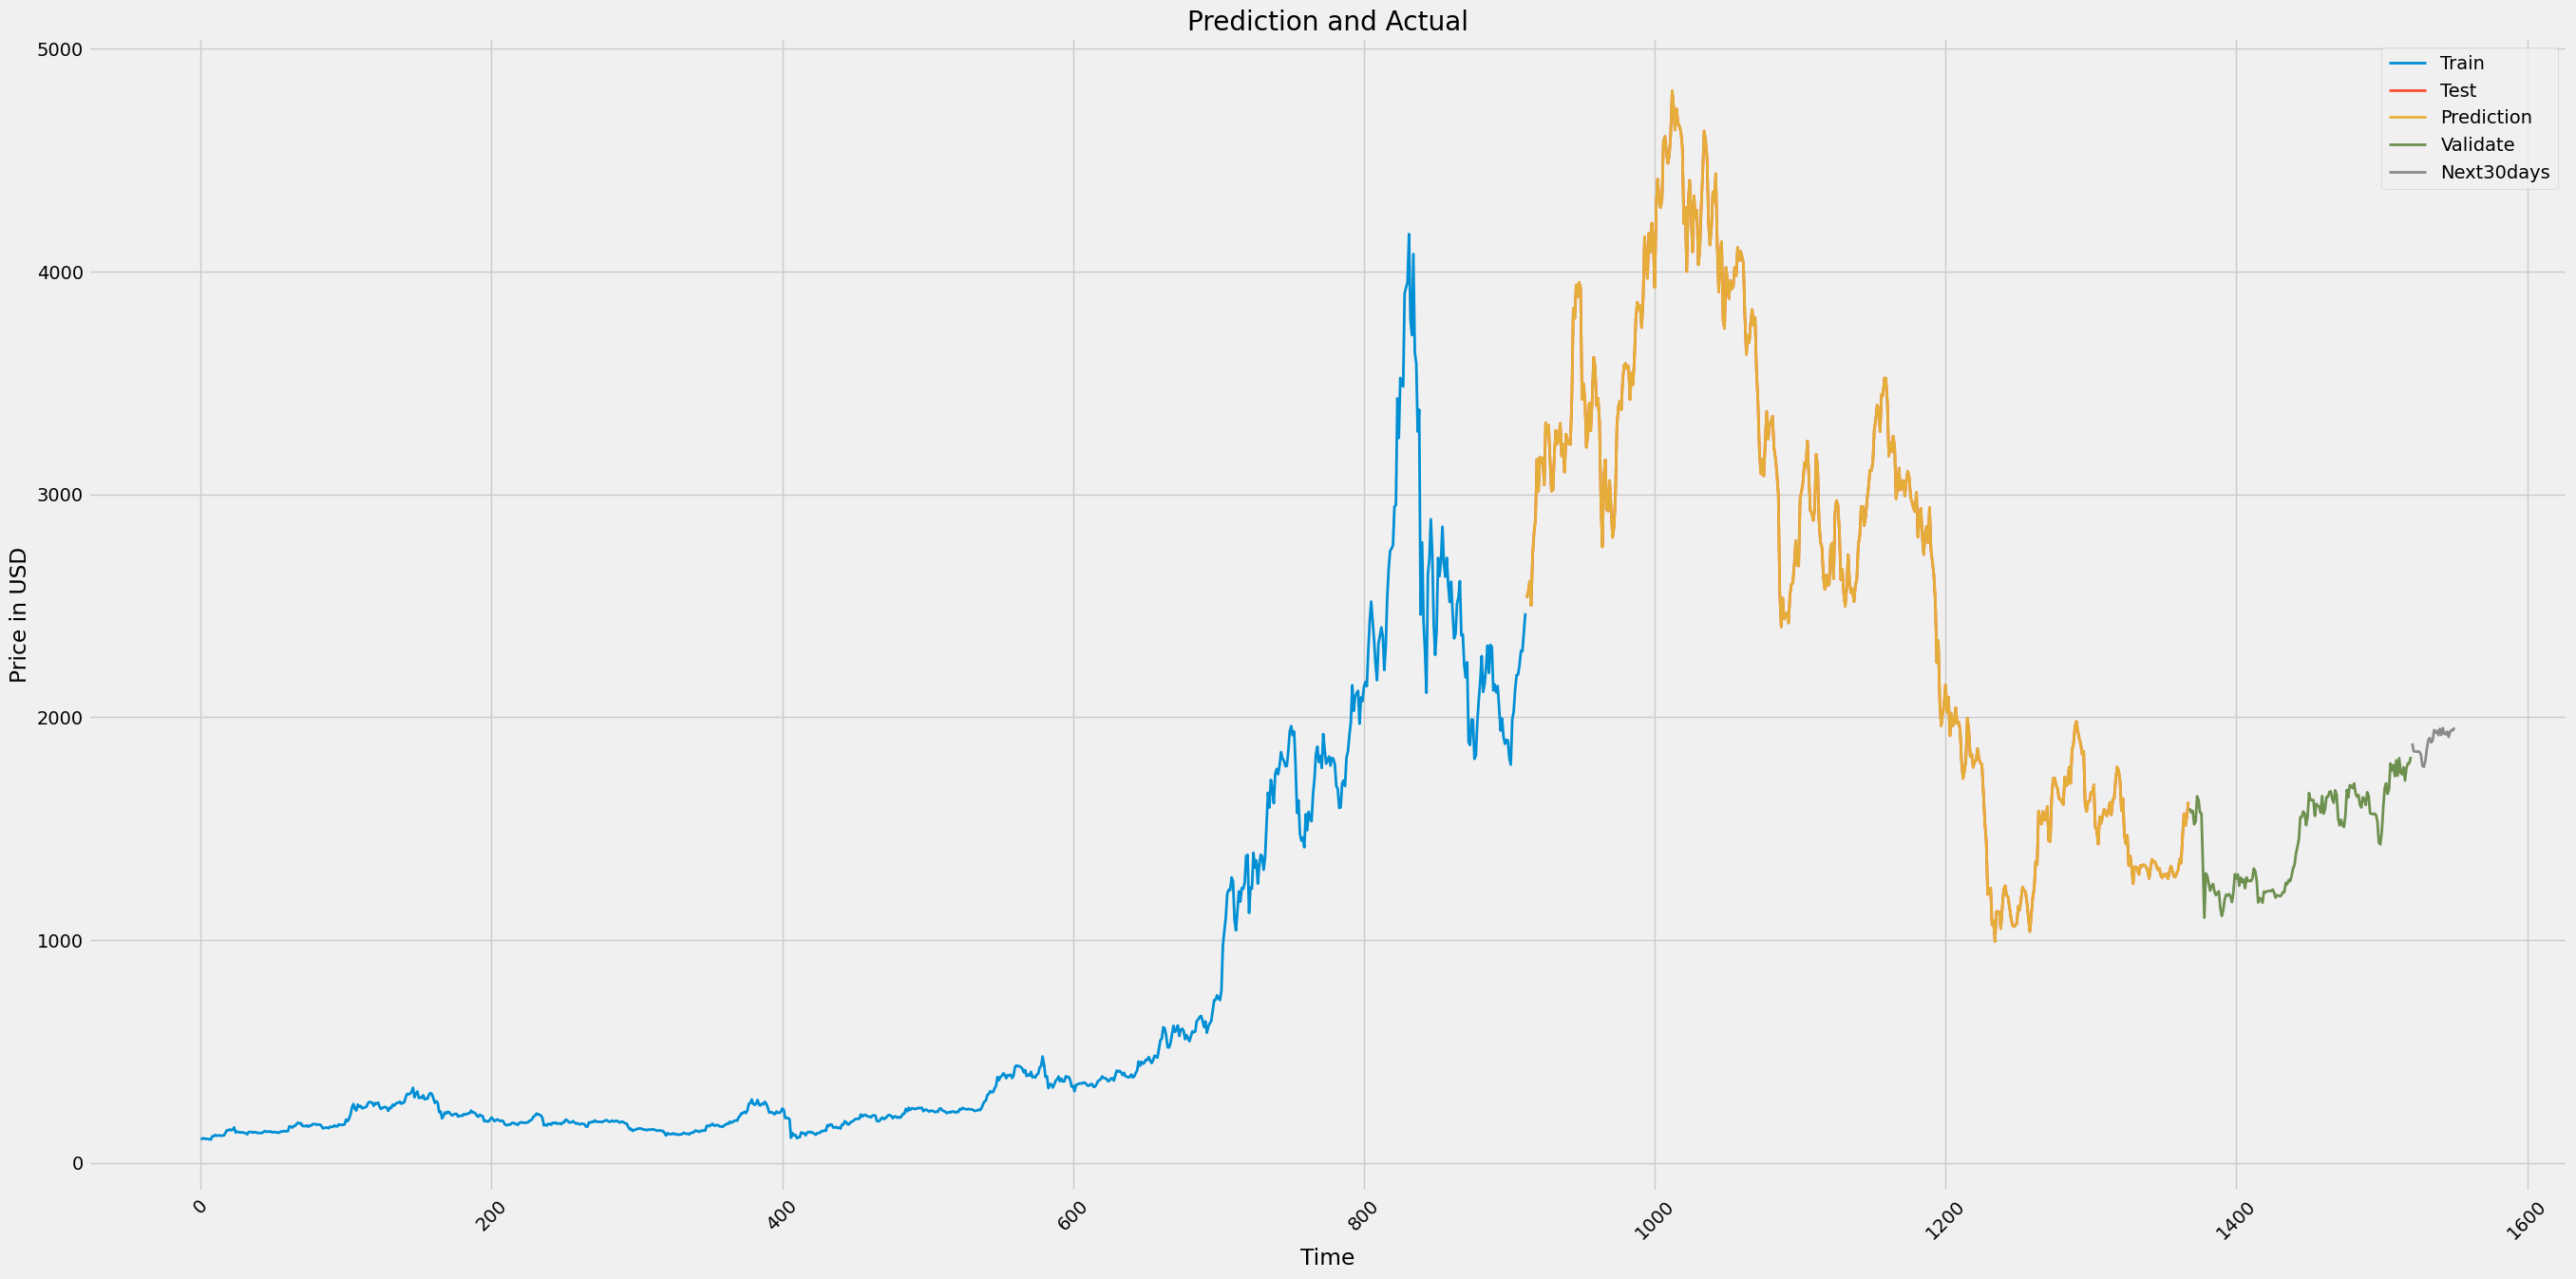

In [148]:
X_test_pred = X_test_pred.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
Y_val = Y_val.reshape(-1, 1)

plt.figure(figsize=(30,15))
plt.grid(True)

# last_30_days = last_30_days.reshape(-1, 1)
# aX_pred = np.concatenate([X,last_30_days])

# plt.plot(actual, data['Close'], label = 'Actual', lw=2)

plt.plot(index_X_train, Y_train, label = 'Train', lw=2)
plt.plot(index_X_test, Y_test, label = 'Test',lw=2)
plt.plot(index_X_test, Y_test_pred, label = 'Prediction', lw=2)
plt.plot(index_X_val, Y_val, label = 'Validate', lw=2)

plt.plot(Predict, lst_output[-30:], label = 'Next30days', lw=2)

plt.title('Prediction and Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()